<a href="https://colab.research.google.com/github/skaty5678/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_SANJEEV_KUMAR_THAKUR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

## <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

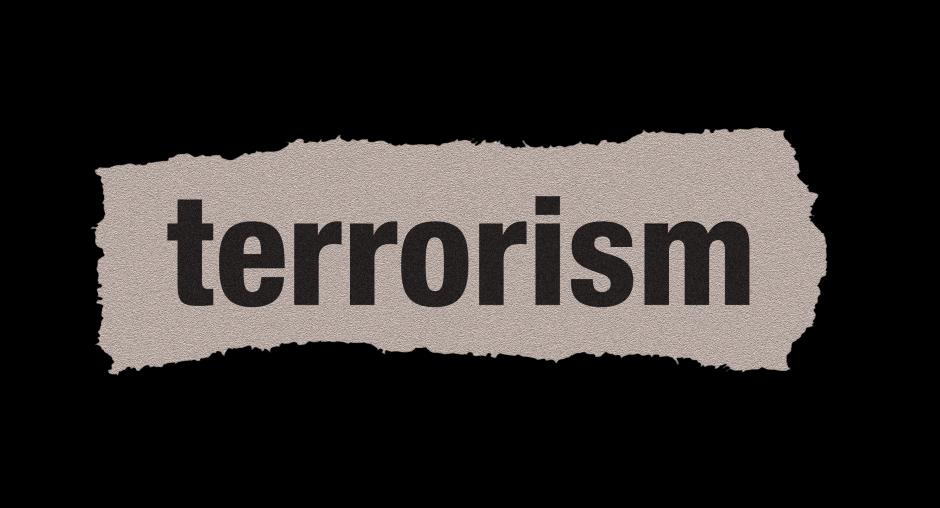

#<b><center>“What separates us from the animals, what separates us from the chaos, is our ability to mourn people we’ve never met.”</b>-David Levithan

#<b>TERRORISM:</b> <i>An Overview</i>





<h3>For the sake of simplicity we will try to get the picture of terrorism from the Global Terrorism Database's construction so that their is no issue in understanding the data visualizations. The GTD database uses the following definition of terrorism:</h3>



> <h3><i>The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. In practice this means in order to consider an incident for inclusion in the GTD, all three of the following attributes must be present:</i></h3>


> <ol>
  <h4>
  <i>
  <li> <b>The incident must be intentional</b> – the result of conscious   calculation on the part of a perpetrator.<br><br>
  <li> <b>The incident must entail some level of violence or immediate threat of violence</b> -including property violence, as well as violence against people.<br><br>
  <li><b>The perpetrators of the incidents must be sub-national actors.</b> The database does not include acts of state terrorism.<br><br>
  </i>
  </h4>
  </ol>

<h3><i>In addition, at least two of the following three criteria must be present for an incident to be included in the GTD:</i></h3> <br> 



> <ul>
  <h4>
  <i>
  <li><b>Criterion 1:</b> The act must be aimed at attaining a political, economic religious, or social goal. In terms of economic goals, the exclusive pursuit of profit does not satisfy this criterion. It must involve the pursuit of more profound, systemic economic change.<br><br>
  <li><b>Criterion 2:</b> There must be evidence of an intention to coerce,      intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims. It is the act taken as a totality that is considered, irrespective if every individual involved in carrying out the act was aware of this intention. As long as any of the planners or decision-makers behind the attack intended to coerce, intimidate or publicize, the intentionality criterion is met.<br><br>
  <li><b>Criterion 3:</b> The action must be outside the context of legitimate warfare activities. That is, the act must be outside the parameters permitted by international humanitarian law, insofar as it targets non-combatants.
  </i>
  </h4>
  </ul>













<h2><b> Column Variables</b></h2>


<i>
<ul>
<li> <b>year, month</b> and <b>date - </b>These fields contain the year, month and date in which the incidents occurred.

<li> <b>region, country</b> and <b>province - </b>These fields identify the region, then drilling down to country or location and then again drilling down to province- where the incident occurred.

<li> <b>latitude</b> and <b>longitude - </b>These fields contain the latitudes and longitudes of the area where the incident occured.

<li> <b>success - </b>Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators.

<li> <b>attack_type - </b>This field captures the general method of attack and often reflects the broad class of tactics used.

<li> <b>target_type - </b>The target or victim type field captures the general type of target/victim

<li> <b>target - </b>The target subtype variable captures the more specific target category and provides
the next level of designation for each target type

<li> <b>weapon_type - </b>This field records the general type of weapon used in the incident.

<li> <b>terror_group - </b>This field contains the name of the group that carried out the attack.

<li> <b>suicide - </b>Cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 

<li> <b>killed - </b>This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident. 

<li> <b>wounded - </b>This field records the number of confirmed non-fatal injuries to both perpetrators and victims.

<li> <b>casualties - </b>Total number of kills and wounded as a direct result of the incident.



<li> <b>summary - </b>A brief narrative summary of the incident, noting the “when, where, who, what, how, and why.”



<li> <b>dbsource - </b>This field identifies the original data collection effort in which each event was recorded. Each value corresponds to a different data collection project or group. The three largest (PGIS, CETIS, and ISVG).
</i>











#<b>Setting the stage for our Dataset</b>


In [ ]:
#Bringing in all the important libraries required for a smooth data visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#the raw data

file_path = '/content/drive/MyDrive/Global Terrorism Analysis - SANJEEV KUMAR THAKUR/Global Terrorism Dataset/Global Terrorism Data.csv'
raw_gtd_df = pd.read_csv(file_path,encoding= 'ISO-8859-1')

In [ ]:
raw_gtd_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
raw_gtd_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#<b>Data cleaning and preparation for analysis.</b>


In [ ]:
#getting the required columns
gtd_df = raw_gtd_df[['iyear','imonth','iday','region_txt','country_txt','provstate','latitude','longitude','success','attacktype1_txt','targtype1_txt','target1','weaptype1_txt','gname','suicide','nkill','nwound','nkillter','summary','motive','propextent','dbsource']]

In [ ]:
#renaming the required columns for easy readability
gtd_df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region_txt':'region','country_txt':'country','provstate':'province','attacktype1_txt':'attack_type','targtype1_txt':'target_type','target1':'target','weaptype1_txt':'weapon_type','gname':'terror_group','nkill':'killed','nwound':'wounded','nkillter':'perpetrator_kill','propextent':'propextent'},inplace = True)

In [ ]:
gtd_df.head()

,year,month,day,region,country,province,latitude,longitude,success,attack_type,target_type,target,weapon_type,terror_group,suicide,killed,wounded,perpetrator_kill,summary,motive,propextent,dbsource
0,1970,7,2,Central America & Caribbean,Dominican Republic,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,MANO-D,0,1.0,0.0,NaN,NaN,NaN,NaN,PGIS
1,1970,0,0,North America,Mexico,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Unknown,23rd of September Communist League,0,0.0,0.0,NaN,NaN,NaN,NaN,PGIS
2,1970,1,0,Southeast Asia,Philippines,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Employee,Unknown,Unknown,0,1.0,0.0,NaN,NaN,NaN,NaN,PGIS
3,1970,1,0,Western Europe,Greece,Attica,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Explosives,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,PGIS
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Incendiary,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,PGIS


In [ ]:
gtd_df.shape

(181691, 22)

In [ ]:
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              181691 non-null  int64  
 1   month             181691 non-null  int64  
 2   day               181691 non-null  int64  
 3   region            181691 non-null  object 
 4   country           181691 non-null  object 
 5   province          181270 non-null  object 
 6   latitude          177135 non-null  float64
 7   longitude         177134 non-null  float64
 8   success           181691 non-null  int64  
 9   attack_type       181691 non-null  object 
 10  target_type       181691 non-null  object 
 11  target            181055 non-null  object 
 12  weapon_type       181691 non-null  object 
 13  terror_group      181691 non-null  object 
 14  suicide           181691 non-null  int64  
 15  killed            171378 non-null  float64
 16  wounded           16

In [ ]:
gtd_df.describe()

,year,month,day,latitude,longitude,success,suicide,killed,wounded,perpetrator_kill,propextent
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,171378.000000,165380.000000,114733.000000,64065.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.403272,3.167668,0.508058,3.295403
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.545741,35.949392,4.199937,0.486912
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,500.000000,4.000000


In [ ]:
#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table



In [ ]:
#getting a tabular data of missing values
missing_values(gtd_df)

,missing values,percent of missing values
motive,131130,72.2
propextent,117626,64.7
perpetrator_kill,66958,36.9
summary,66129,36.4
wounded,16311,9.0
killed,10313,5.7
longitude,4557,2.5
latitude,4556,2.5
target,636,0.4
province,421,0.2


In [ ]:
#removing the columns with high proportion of missing data 
gtd_df.drop(['motive','propextent','perpetrator_kill'],axis = 1,inplace = True)

#for Summary column where we don't have any data we'll replace it with unknown
gtd_df['summary'].replace(np.nan,'Unknown',inplace = True)

#Fill the NaN values in the killed and wounded columns with median as they're very few in numbers compared to our dataset
median = gtd_df.filter(["killed", "wounded"]).median()
gtd_df[["killed", "wounded"]]=gtd_df[["killed", "wounded"]].fillna(median.iloc[0])


In [ ]:
#adding another column to the dataset as casualties
gtd_df['casualties'] = gtd_df['killed'] + gtd_df['wounded']

In [ ]:
#updated missing values
missing_values(gtd_df)

,missing values,percent of missing values
longitude,4557,2.5
latitude,4556,2.5
target,636,0.4
province,421,0.2
year,0,0.0
weapon_type,0,0.0
dbsource,0,0.0
summary,0,0.0
wounded,0,0.0
killed,0,0.0


In [ ]:
#Let's just try to visualise the missing data to have a better idea about it
import missingno as msno

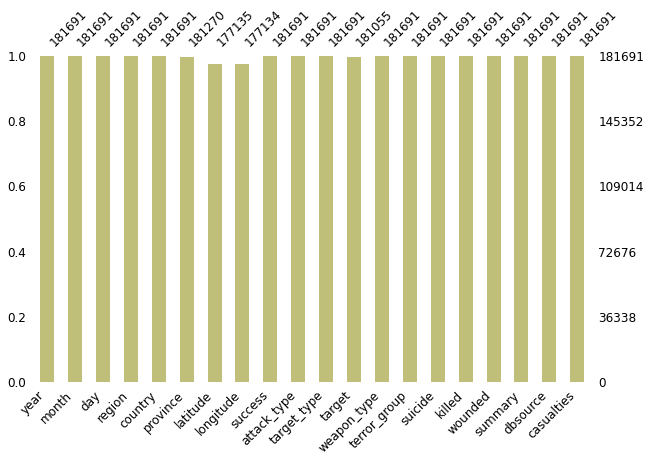

In [ ]:
# visualising the missing values
msno.bar(gtd_df,figsize = (10,6),fontsize = 12,color = (0.75,0.75,0.475))


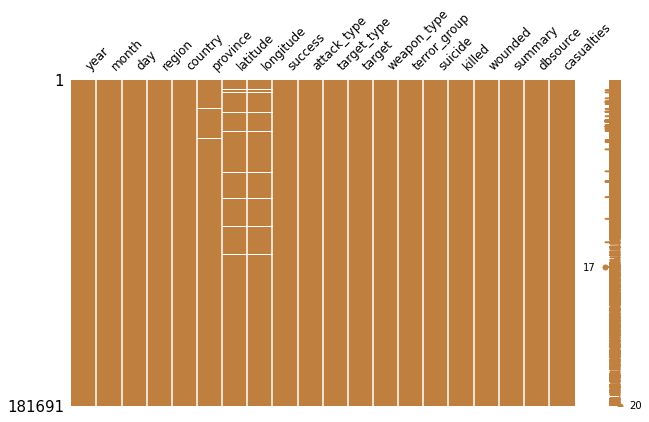

In [ ]:
# visualising where exactly the missing values are 
msno.matrix(gtd_df,figsize = (10,6),fontsize = 12,color = (0.75,.50,0.25))

#<b>Exploratory Data Analysis and Visualizations</b>



In [ ]:
# representing the correlation between different variables
gtd_df.corr()

,year,month,day,latitude,longitude,success,suicide,killed,wounded,casualties
year,1.000000,0.000139,0.018254,0.166933,0.003917,-0.082963,0.137736,0.021252,0.017484,0.020675
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,-0.002845,0.003071,0.004031,0.003178,0.003805
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.011802,0.003593,-0.003225,-0.001082,-0.001808
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.073715,0.068682,-0.013170,0.015920,0.009899
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000858,0.000486,-0.000587,0.000205,0.000013
success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,1.000000,-0.031155,0.049619,0.023346,0.033487
suicide,0.137736,0.003071,0.003593,0.068682,0.000486,-0.031155,1.000000,0.136385,0.096101,0.119057
killed,0.021252,0.004031,-0.003225,-0.013170,-0.000587,0.049619,0.136385,1.000000,0.443326,0.651885
wounded,0.017484,0.003178,-0.001082,0.015920,0.000205,0.023346,0.096101,0.443326,1.000000,0.968724
casualties,0.020675,0.003805,-0.001808,0.009899,0.000013,0.033487,0.119057,0.651885,0.968724,1.000000


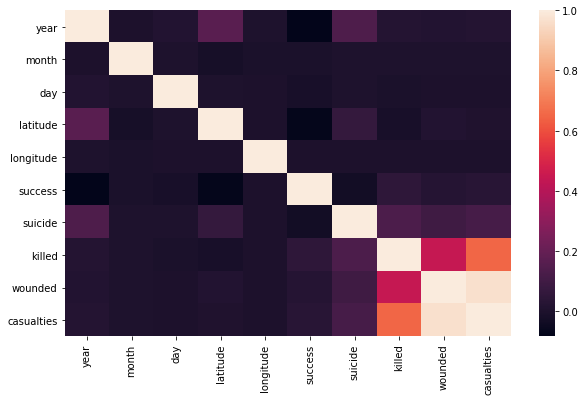

In [ ]:
#correlation heatmap
plt.subplots(figsize=(10,6))
sns.heatmap(gtd_df.corr(),annot = False)
plt.show()


####<i>As it's very obvious from the visualization that there is not much of a correlation except the kills, wounded and casulties show positive correlation upto a cetain extent.</i>

###.

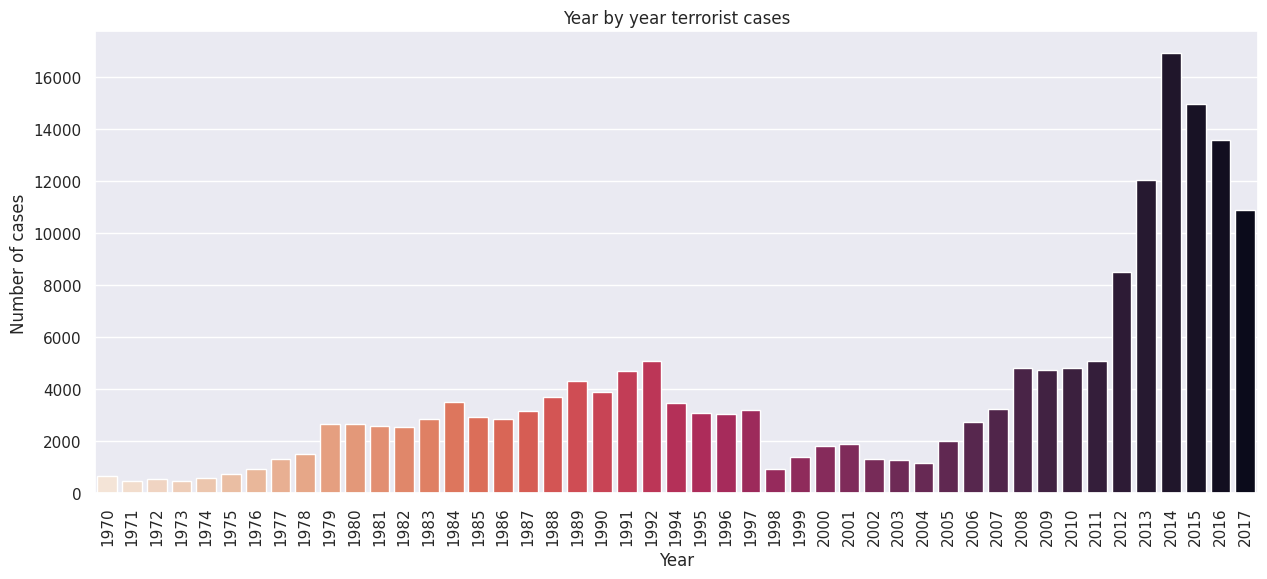

In [ ]:
#using seaborn to plot the number of terrorist cases VS year
plt.subplots(figsize=(15,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot('year',data = gtd_df,palette='rocket_r').set(title = 'Year by year terrorist cases',xlabel = 'Year',ylabel = 'Number of cases')
plt.xticks(rotation = 90)
plt.show()


####<i>Pretty evidently there has been a boost to the number of terrorist activities since 2004-05 with 2014 being the worst hit year by those atrocities which is a matter of concern.</i>

###.

In [ ]:
#using groupby to get a table comparing the trend in cases and kills by year
case_kill_df = pd.DataFrame(gtd_df.groupby(['year'],as_index = True).killed.agg(['count','sum']))
case_kill_df.rename(columns = {'count':'total cases','sum':'total killed'},inplace = True)
case_kill_df.reset_index(inplace = True)


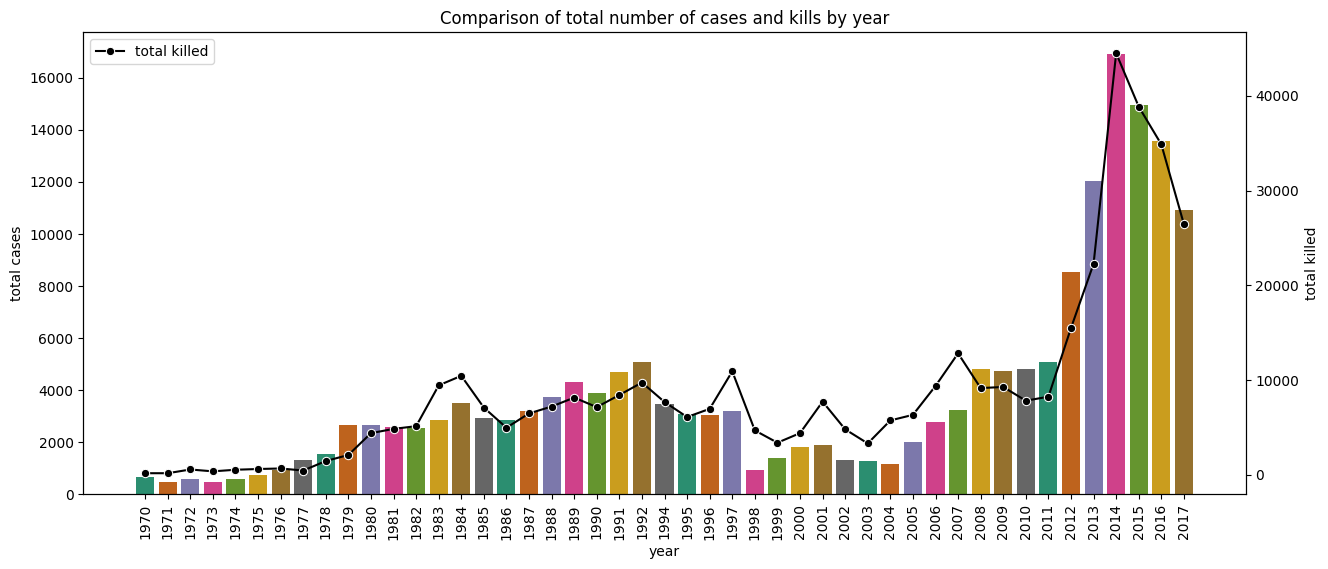

In [ ]:
#removing grid lines
import matplotlib
matplotlib.rc_file_defaults()

#Visualising what has been the trend between the total cases and the total killed vs each year
ax1 = sns.set_style(style = None,rc = None)
fig, ax1 = plt.subplots(figsize=(15,6))

#creating the bar plot
ax1.set_title('Comparison of total number of cases and kills by year', fontsize=12)
ax1 = sns.barplot( y='total cases',x= 'year' ,data = case_kill_df,alpha = 1,palette = 'Dark2')

#specifying that we want to share the same x-axis
ax2 = ax1.twinx()

#creating the line plot 
ax2 = sns.lineplot(data = case_kill_df['total killed'],marker = 'o',color = 'black')

#plot
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.legend(['total killed'])
plt.show()

####<i>A worrisome scenario that is visible from the graph is that in the decade stretching from 1970 to 1980 total number of cases in proportion to total number of deaths have been high but since 1980 onwards there has been an escalated upward trend in the total deaths as compared to total cases which tells us about the severity of the attack methods used to execute activities.Large spikes in the number of kills per year are associated with landmark and notable terrorist events.</i>

###.

In [ ]:
#installing BaseMap for map visualization
%%capture
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

In [ ]:
from mpl_toolkits.basemap import Basemap

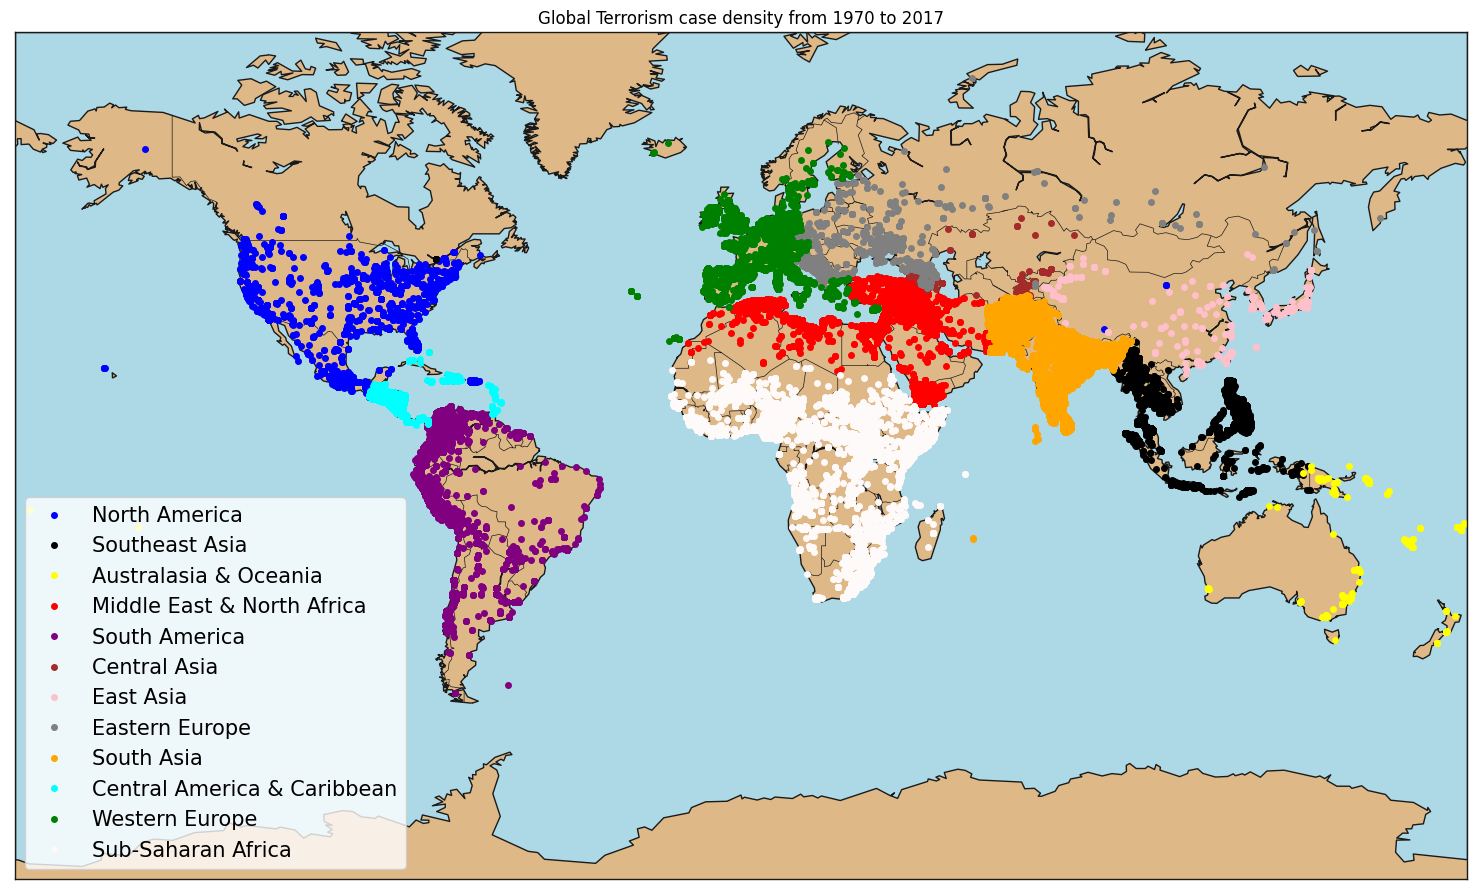

In [ ]:
#getting the basemap with all the required fields
plt.figure(figsize=(30,11))
map_type = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,resolution='c',lat_ts=20,)
map_type.drawcoastlines()
map_type.drawcountries()
map_type.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
map_type.drawmapboundary(fill_color='lightblue')

#list of all the regions and assigning colours to those regions
regions_list = list(set(gtd_df.region))
colors = ['blue', 'black' ,'yellow', 'red', 'purple', 'brown', 'pink',
          'grey', 'orange', 'cyan', 'green', 'snow']

#defining the longitude and latitude as plot points for the map
def pltpoints(region, color = None, label = None):
    long, lat = map_type(list(gtd_df.longitude[gtd_df.region == region].astype("float")),\
            (list(gtd_df.latitude[gtd_df.region == region].astype("float"))))
    points = map_type.plot(long, lat, "o", markersize = 4, color = color, label = label, alpha = 1)
    return points

#iterating through the regions list for plotting on the map
for j, region in enumerate(regions_list):
    pltpoints(region, color = colors[j], label = region)  
    
plt.title("Global Terrorism case density from 1970 to 2017")
plt.legend(loc ='lower left', prop= {'size':15})
plt.show()    

####<i>One noticeable thing that this map shows is that the developing  or the underdeveloped countries with high population density are the ones with highest number of cases.</i>

###.

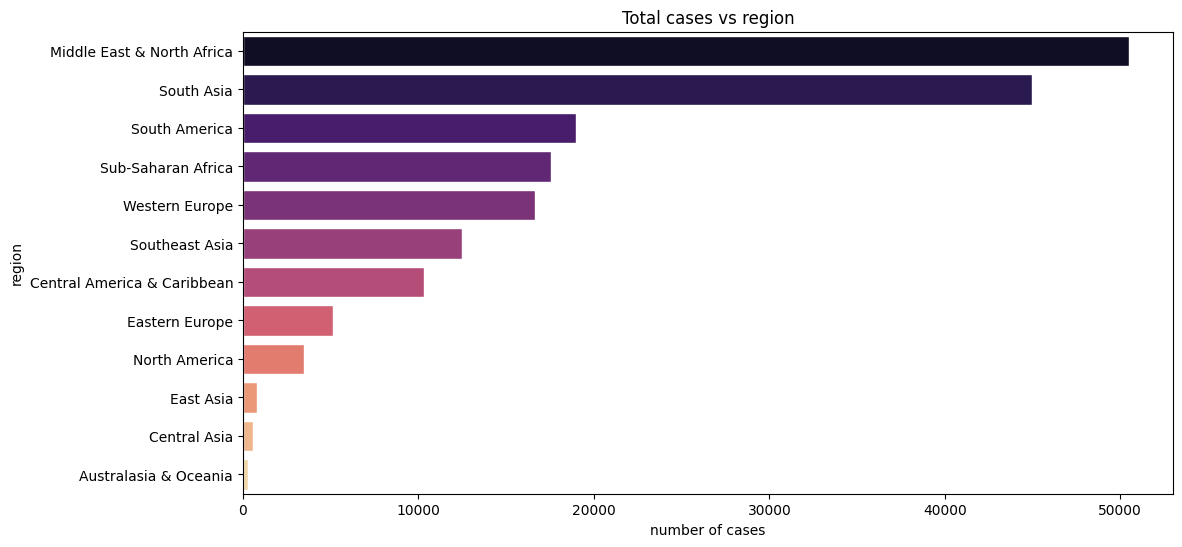

-------------------------------------------------------------------------------------------------------------------------


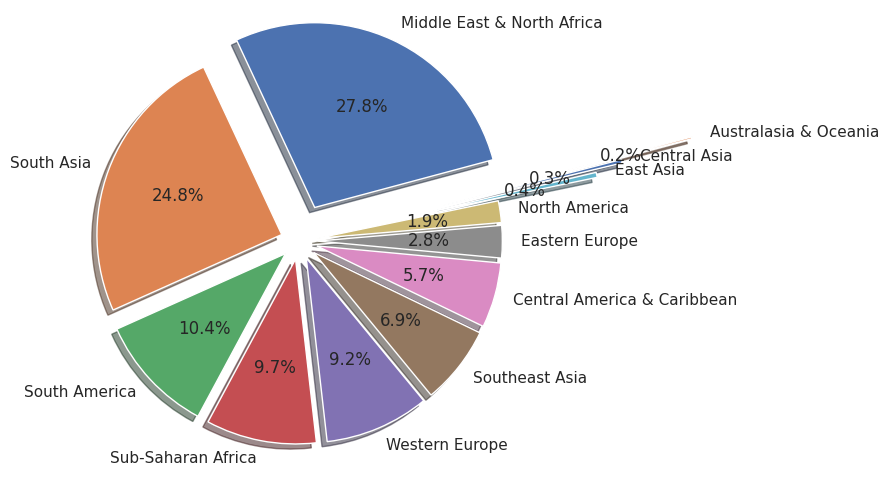

In [ ]:
#A countplot of total number of cases by region
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y = 'region',data = gtd_df,order = gtd_df['region'].value_counts().index,palette = 'magma').set(title = 'Total cases vs region',ylabel = 'region',xlabel = 'number of cases')
plt.show()

print(f'-------------------------------------------------------------------------------------------------------------------------')

#A pie chart showing the percentage wise distribution of total number of cases per region
plt.subplots(figsize=(12,6))
pie_region = gtd_df['region'].value_counts()
my_explode = (0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.65,0.8,1.2)
plt.pie(pie_region,labels = pie_region.index,startangle = 15,autopct='%1.1f%%',shadow = True,explode = my_explode)
plt.show()

####<i>Middle east and South African region is the most hit by the terrorist activities with almost 50,000 cases, followed by South Asia with cases mounting close to 44,000 cases and then followed by South Ameirca and the other regions.East Asia, Central Asia and Australia and Oceania are the regions with low number of cases compared to the other regions. 


####South Asia being the second in the list is a major concern for India too.</i>

###.

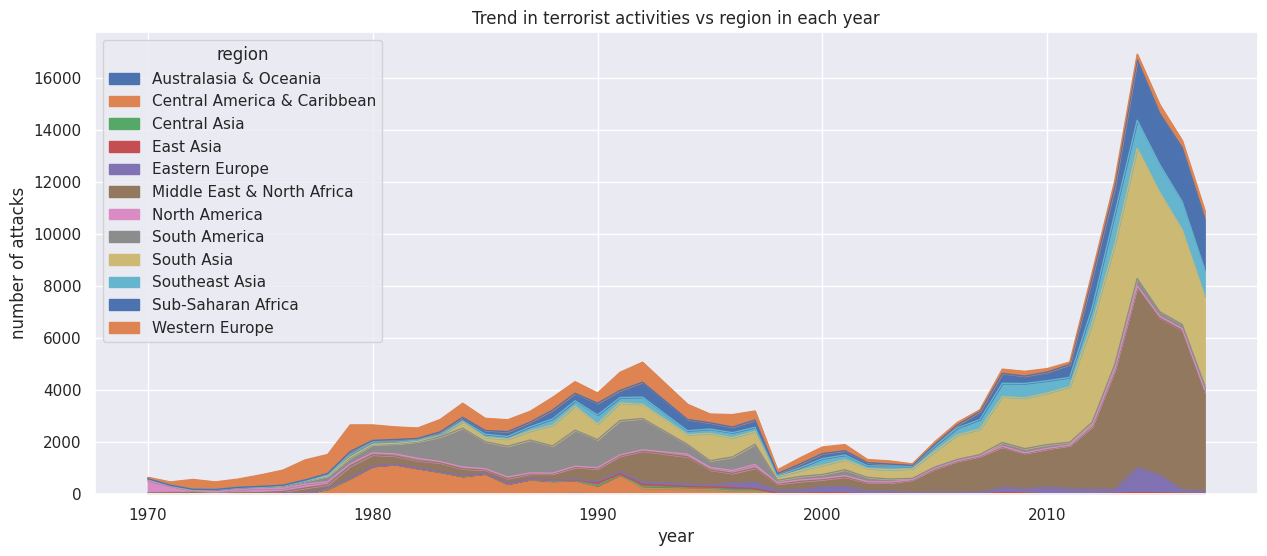

In [ ]:
#a year by year trend in the number of cases for each region
pd.crosstab(gtd_df.year, gtd_df.region).plot(kind='area',figsize=(15,6),linewidth = 1)
plt.title('Trend in terrorist activities vs region in each year')
plt.xlabel('year')
plt.ylabel('number of attacks')
plt.show()

####<i>South Asia and Middle East and North Africa have seen a sudden and continuous spike in the number of terrorist activites after the year 2000 without any significant drop in the number of cases.</i>

###.

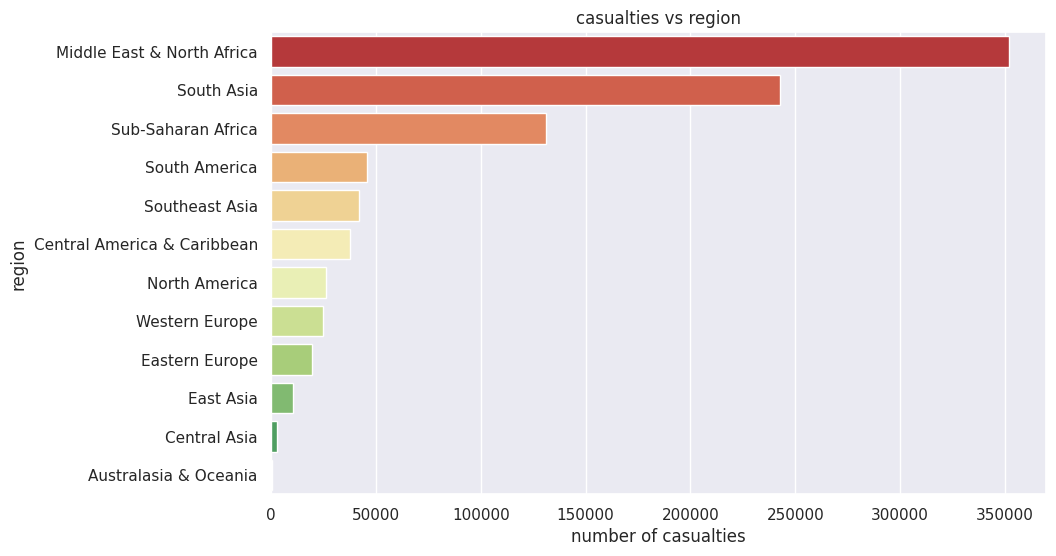

In [ ]:
#using groupby to find the number of casualties by region
kills_by_region= gtd_df.groupby(['region']).casualties.sum()
kills_by_region = kills_by_region.sort_index(level=['region']).sort_values(ascending = False)

#plotting the graph
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(y = kills_by_region.index,x = kills_by_region.values,palette = 'RdYlGn').set(title = 'casualties vs region',ylabel = 'region',xlabel = 'number of casualties')
plt.show()

####<i>Middle East and North Africa region has got the most number of casualties from the attacks, close to 3,50,000 casualties with South Asia trailing behind with approximate casualties around 2,50,000 and then Sub - Saharan Africa and other regions.</i>

###.

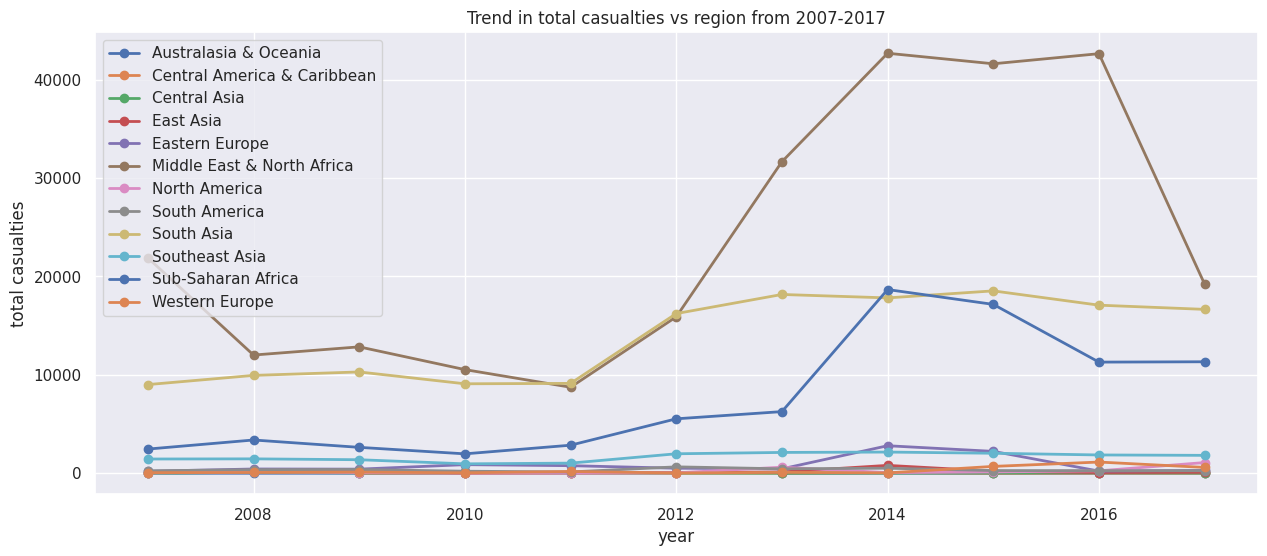

In [ ]:
#what has been the trend in the total casualties for each region between the years 2007-2017
pd.crosstab(index = gtd_df['year'], columns = gtd_df['region'],values=gtd_df['casualties'],aggfunc=np.sum)[-11:].plot(kind='line',figsize = (15,6),linewidth = 2,marker = 'o')
plt.title('Trend in total casualties vs region from 2007-2017')
plt.xlabel('year')
plt.ylabel('total casualties')
plt.legend(loc = 0)
plt.show()

####<i>Middle East, Sub Saharan Africa and South Asia have seen a sudden spike in the total number of casualities in the decade starting 2007.One interesting point to ponder is that there has been an anomalistic behaviour with a sudden decline in the total number of casualities in the Middle East region from 2016 to 2017. The reason behind that being since mid 2015 ISIL had lost most of its territory to the counter terrorism forces and by 2016 they had significant blow to their territorial gains and manpower.</i>

###.

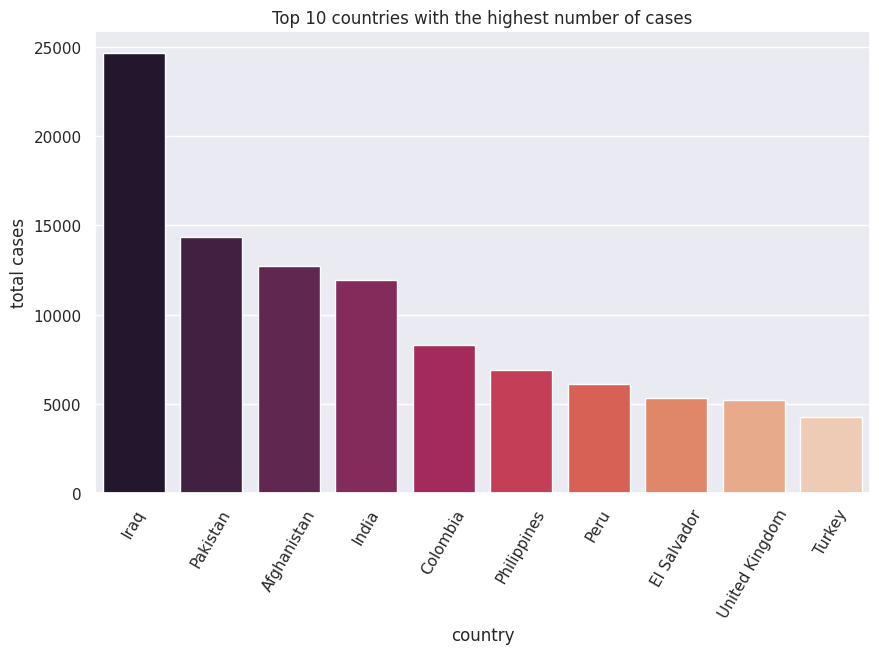

In [ ]:
#Bar plot showing the top 10 countries with the most number of cases
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = gtd_df['country'].value_counts()[:10].index,y = gtd_df['country'].value_counts()[:10].values,palette = 'rocket').set(title = 'Top 10 countries with the highest number of cases',xlabel = 'country',ylabel = 'total cases')
plt.xticks(rotation = 60)
plt.show()

####<i>Digging deeper into the region to find country wise terrorist activities it's quite visible that Iraq tops the list from the Middle East and North Africa region and then followed by next three South Asian regions i.e.Pakistan, Afghanistan and India. All these countries are densely populated and still developing countries in the development index too.

####India is fourth in the list because of the very reason that the population and population density is very high.</i>

###.

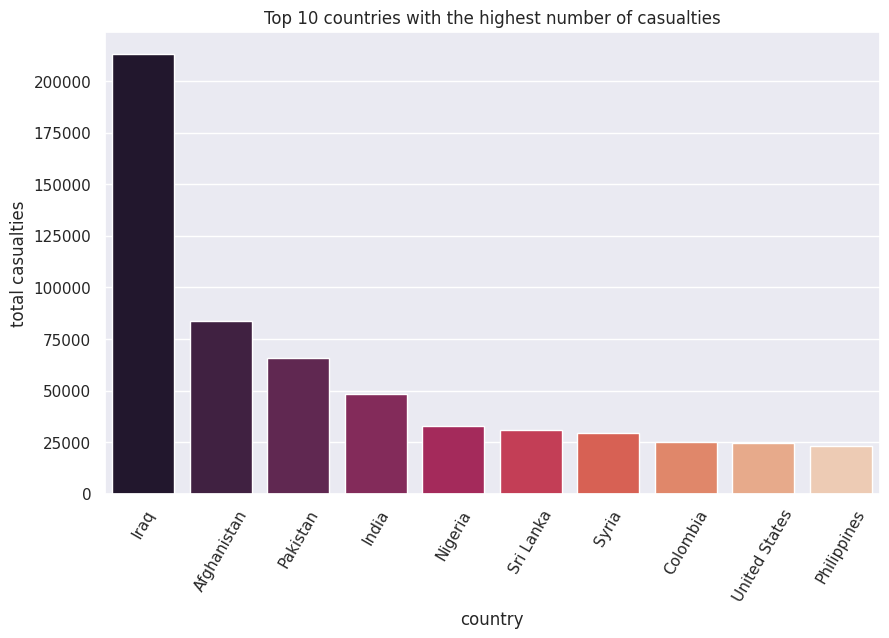

In [ ]:
#creating a temporary dataframe of casualties by country
cas_country = pd.DataFrame(gtd_df.groupby(['country']).casualties.agg(['sum']).sort_values('sum',ascending = False))
cas_country.reset_index(inplace = True)
cas_country[:10]

#plotting the graph
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = cas_country['country'][:10],y = cas_country['sum'][:10].values,palette = 'rocket').set(title = 'Top 10 countries with the highest number of casualties',xlabel = 'country',ylabel = 'total casualties')
plt.xticks(rotation = 60)
plt.show() 

####<i>The number of casualty in countries very closely follows the graph in number of cases with few exceptions as US, Syria, Sri Lanka and some others. One of the possible reasons are because in countries having exception with low cases and high casualties, the weapons used or the attacking methods are the ones which are of high intensity.</i>

###.

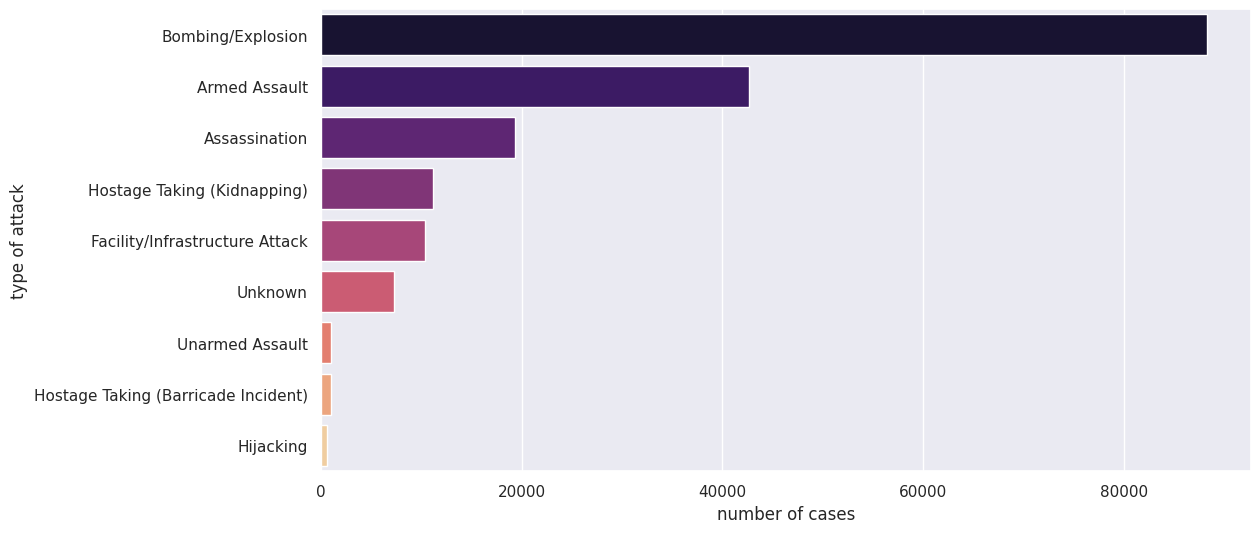

In [ ]:
#Visualising which attack type has the share of what number of cases 
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y='attack_type',data = gtd_df,order = gtd_df['attack_type'].value_counts().index,palette = 'magma').set(ylabel = 'type of attack',xlabel = 'number of cases')
plt.show()

####<i>Bombing/Explosion followed by Armed Assault has been the mostly favoured attack type methods when it comes to execution of attacks.</i>

###.

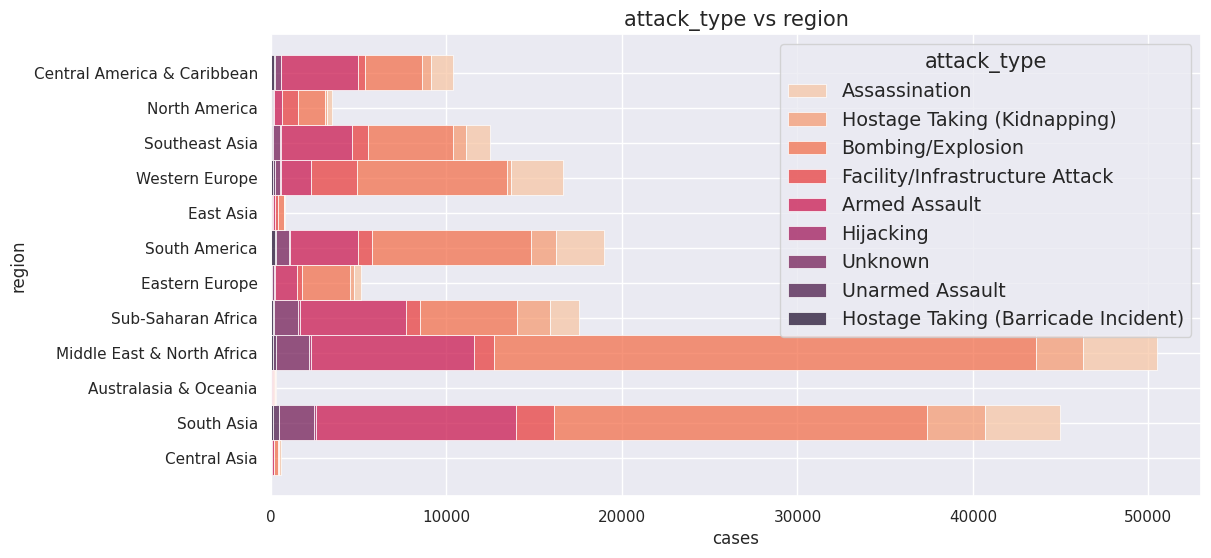

In [ ]:
#which attack type was the most resorted to in each of the regions
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook',font_scale=1.25)
sns.histplot(y = 'region',data = gtd_df,hue = "attack_type",multiple="stack",palette="rocket_r",linewidth = 0.5).set(title = 'attack_type vs region',xlabel = 'cases',ylabel = 'region')
plt.xticks(rotation = 0)
plt.show()

####<i>As we saw earlier that Bombing/Explosion then Armed Assault have been the most prominent method to go with when it comes to implementing their activity. It is quiet visible that it has been the most prominent attack types with the highest share, irrespective of the region.</i>

###.

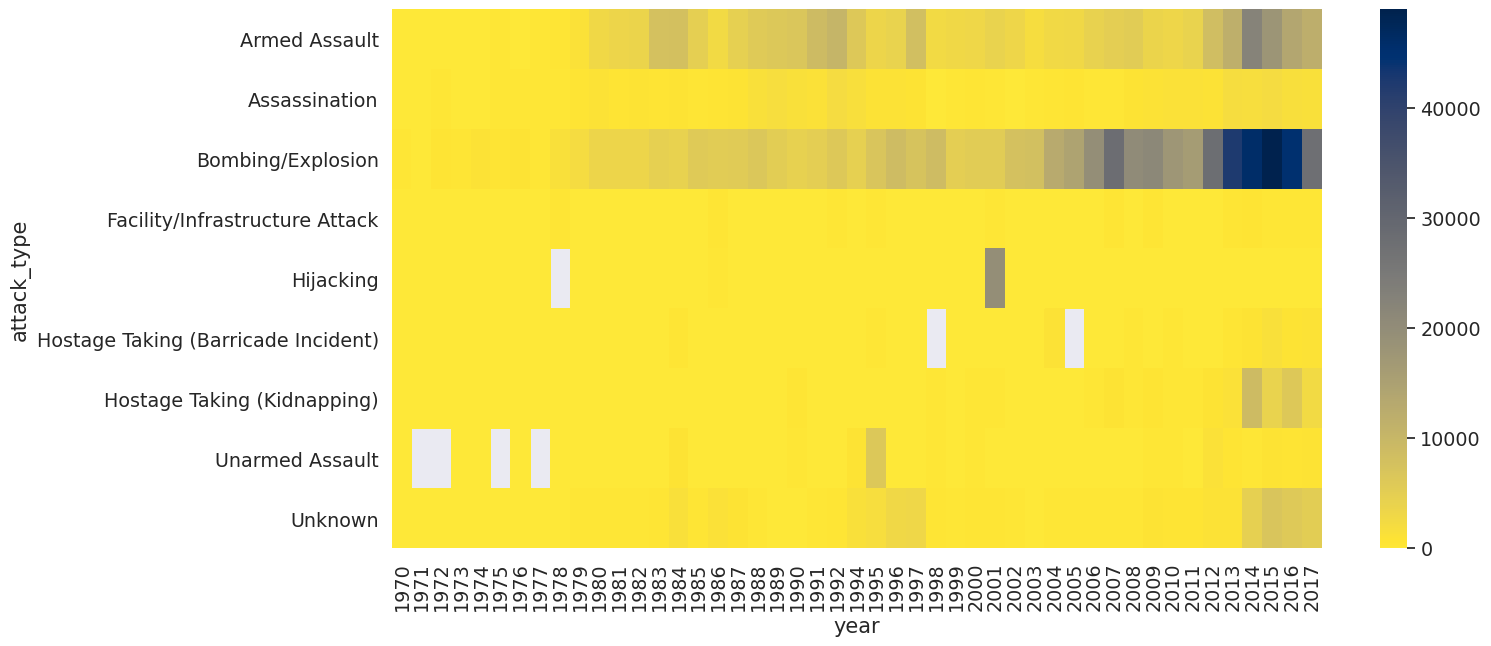

In [ ]:
attack_yr_cas = pd.crosstab(index = gtd_df['attack_type'], columns = gtd_df['year'],values=gtd_df['casualties'],aggfunc=np.sum)
plt.subplots(figsize=(15,7))

sns.heatmap(attack_yr_cas,annot = False,cmap = 'cividis_r')
plt.show()

####<i>As is visibe from the visualization that since 1980 there has been a constant increase in Bombing/Explosion and Armed Assault, these methods are reason for the most number of people getting killed and wounded.

####We have kept the null values here too, just to have an idea about which attack type has no records in which year.</i>

###.

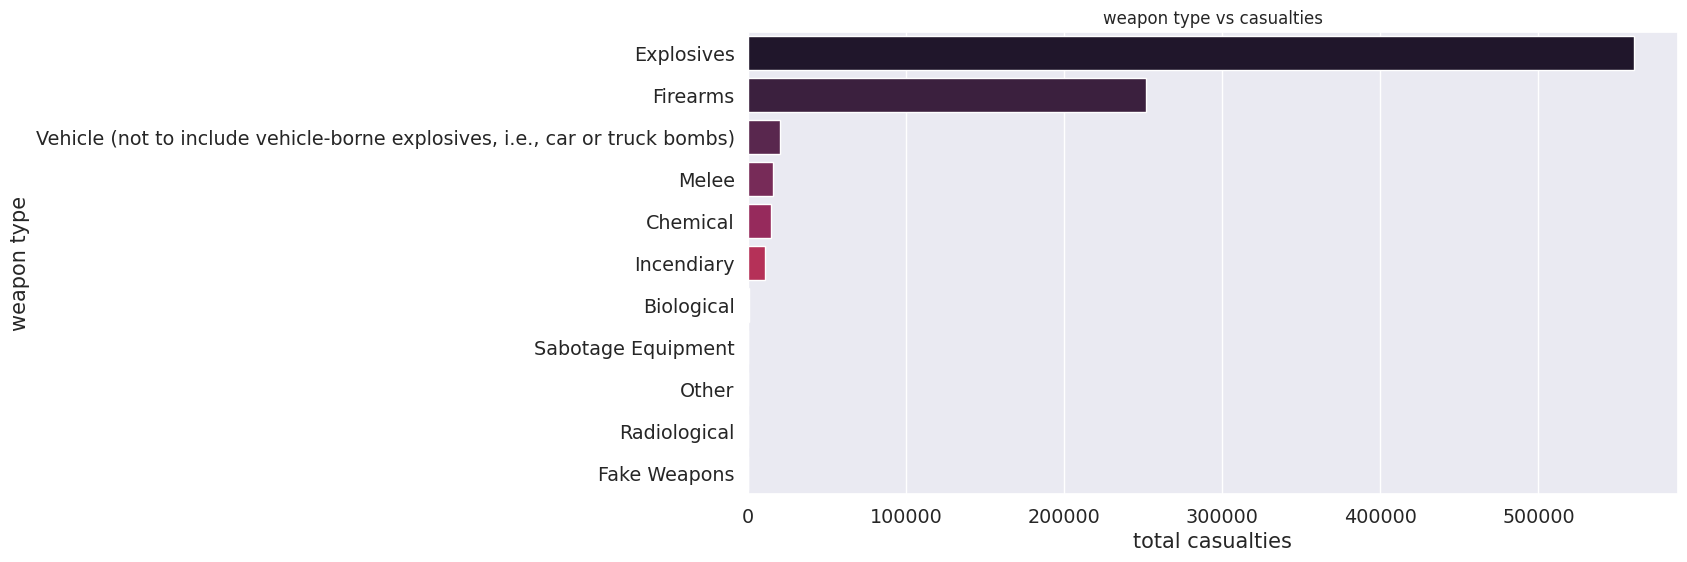

In [ ]:
#casualties with respect to weapon types
gtd_weapon = pd.DataFrame(gtd_df.groupby(['weapon_type']).casualties.agg(['count','sum']).sort_values('sum',ascending = False))
gtd_weapon.reset_index(inplace = True)
gtd_weapon.rename(columns = {'count':'total_cases','sum':'total_casualties'},inplace = True)

#excluding the unknown weapon types
z_2 = gtd_weapon.loc[gtd_weapon['weapon_type'] != 'Unknown']
z_2

#plotting the graph
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = z_2['total_casualties'],y = z_2['weapon_type'],palette = 'rocket').set(title = 'weapon type vs casualties',ylabel = 'weapon type',xlabel = 'total casualties')
plt.xticks(rotation = 0)
plt.show()

####<i>By far the explosives are the weapons that have been used indiscriminately and most extensively for wrecking havoc. Almost 56000 casualties are recorded for the weapon type explosives. Firearms has been the second chosen weapon type with casualties close to 26000 people.</i>

###.

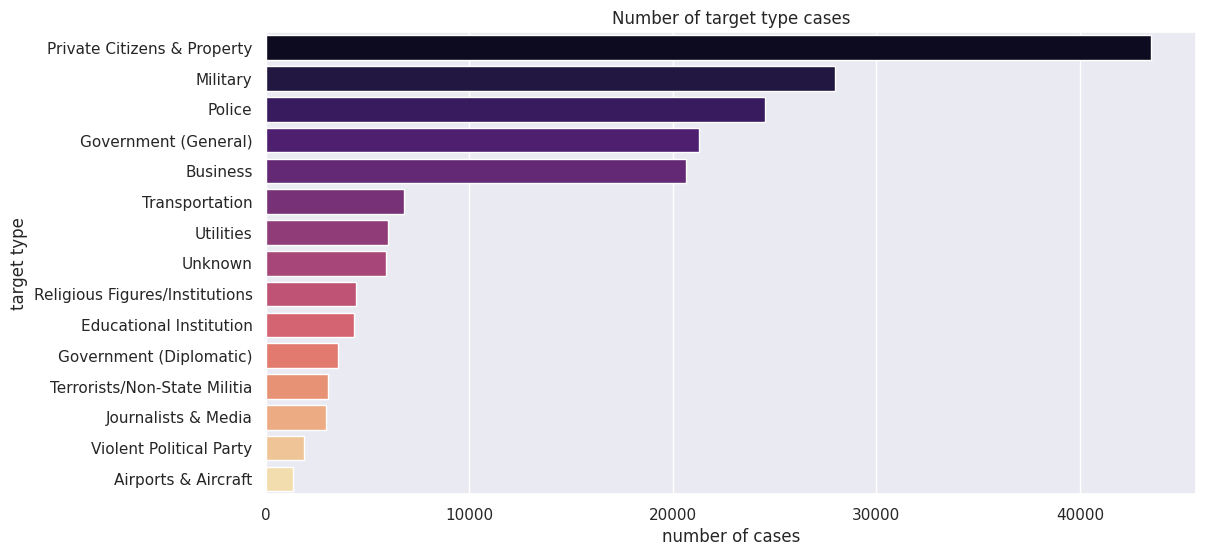

In [ ]:
#Target type with the most number of cases
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y ='target_type',data = gtd_df,order = gtd_df['target_type'].value_counts()[:15].index,palette = 'magma').set(title = 'Number of cases by target type',ylabel = 'target type',xlabel = 'number of cases')
plt.show()

####<i>Whatever the personal motive or agenda be for a terrorist activity, in any case, civilians suffer the most. As it is very evident from the graph that private citizens and property has been the most targetted group type followed by military which does makes sense because they are the one fighting terrorists in the conflict zones which leads to more number of casualities.</i>

###.

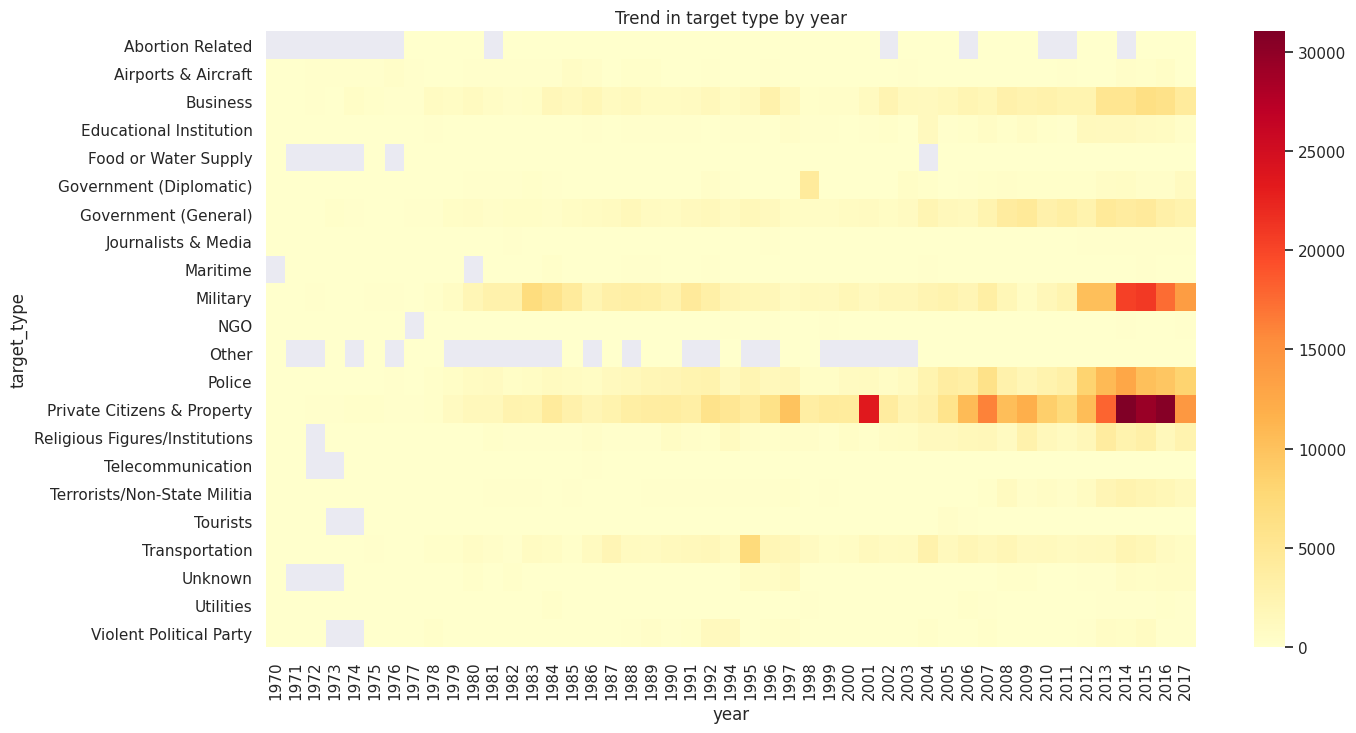

In [ ]:
#target type casualties trend with year
yr_target_cas = pd.crosstab(columns = gtd_df['year'], index = gtd_df['target_type'],values=gtd_df['casualties'],aggfunc=np.sum)
plt.subplots(figsize=(15,8))

#plotting the heatmap
sns.heatmap(yr_target_cas, fmt='.2%',cmap = 'YlOrRd')
plt.title("Trend in target type by year")
plt.show()

####<i>The most affected ones in the decreasing order of target type are the Private Citizen and property > Military > Police > Government(General) > Business and so on. These are the target types that have continously been targetted by terrorist groups since mid 1985 and have suffered even more casualties yearly after 2011.</i>

###.

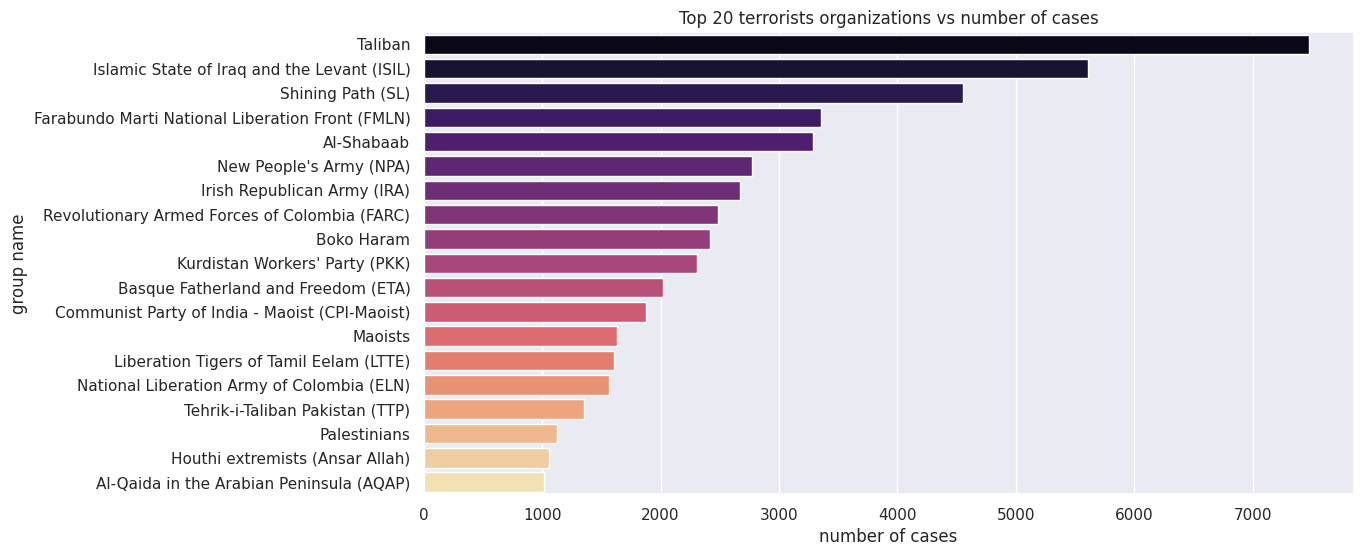

In [ ]:
#terrorist group vs total cases
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y='terror_group',data = gtd_df,order = gtd_df['terror_group'].value_counts()[1:20].index,palette = 'magma').set(title = 'Top 20 terrorists organizations vs number of cases',ylabel = 'group name',xlabel = 'number of cases')
plt.show()

####<i>Taliban has been the terorist group responsible for most number of the turbulences worldwide followed by ISIL and Shining path.</i>

###.

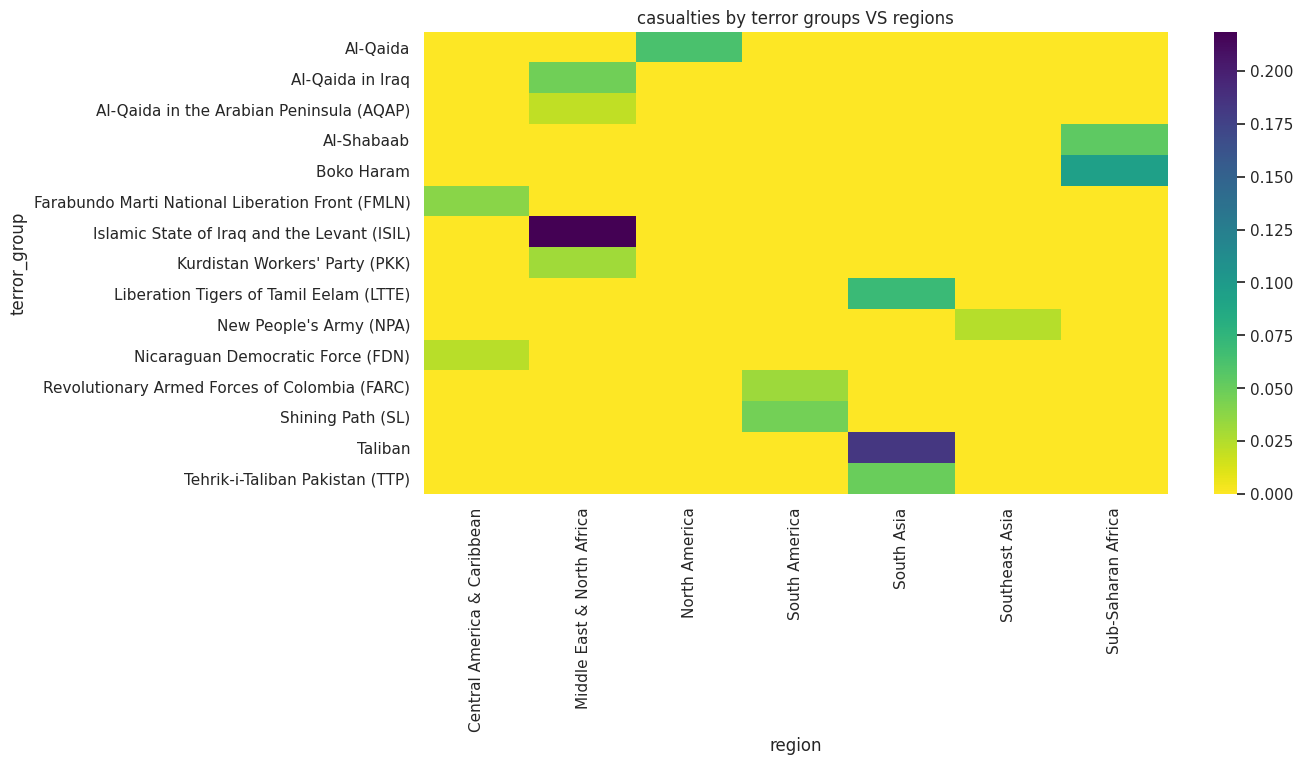

-------------------------------------------------------------------------------------------------------------------------


,terror_group,region,total casualties
2,Islamic State of Iraq and the Levant (ISIL),Middle East & North Africa,68255.0
3,Taliban,South Asia,57337.0
4,Boko Haram,Sub-Saharan Africa,29801.0
6,Liberation Tigers of Tamil Eelam (LTTE),South Asia,22020.0
7,Al-Qaida,North America,19494.0
8,Al-Shabaab,Sub-Saharan Africa,16954.0
10,Tehrik-i-Taliban Pakistan (TTP),South Asia,15574.0
11,Al-Qaida in Iraq,Middle East & North Africa,14721.0
12,Shining Path (SL),South America,14632.0
13,Farabundo Marti National Liberation Front (FMLN),Central America & Caribbean,12130.0


In [ ]:
# groupby on terorist groups in the regions where they have wrecked havoc 
gtd_x = pd.DataFrame(gtd_df.groupby(['terror_group','region']).casualties.agg(['sum']).sort_values('sum',ascending = False))
gtd_x.reset_index(inplace = True)

#renaming the columns
gtd_x.rename(columns = {'sum':'total casualties'},inplace = True)

#excluding the unknown terrorist groups from the plot
z = gtd_x.loc[gtd_x['terror_group'] != 'Unknown'][:15]


cross3 = pd.crosstab(index = z['terror_group'], columns = z['region'],values=z['total casualties'],aggfunc=np.sum,normalize = 'all')

#plotting the heatmap 
plt.subplots(figsize=(12,6))
sns.heatmap(cross3, fmt='.2%',cmap = 'viridis_r')
plt.title("casualties by terror groups VS regions")
plt.show()
print(f'-------------------------------------------------------------------------------------------------------------------------')
#keeping the table for reference
z


####<i>Islamic State of Iraq and the Levant has been the major cause of destruction in the Middle East and North Africa region with casualties close to 70,000. And so does Taliban in the South Asia region with the similar number of casualties close to 60,000 .Boko Haram recognised as one of the most violent and barbarous terrorist group are most prominent in Sub Saharan Africa.</i>

###.

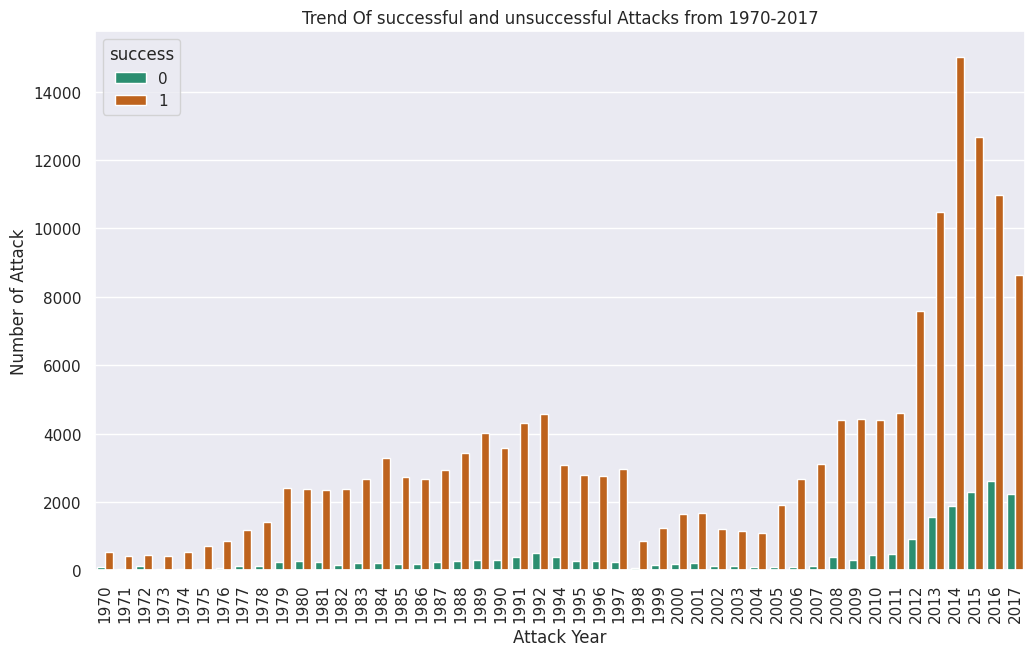

In [ ]:
#Trend in successful and unsuccessful attacks vs year
plt.subplots(figsize=(12,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(x='year',hue='success',data=gtd_df,palette = 'Dark2').set(title = 'Trend Of successful and unsuccessful Attacks from 1970-2017',xlabel = 'Attack Year',ylabel = 'Number of Attack')
plt.xticks(rotation = 90)
plt.show()

####<i>It is very obvious from the first visualization that yearwise increase in number of cases was visible since 2000 but here we are able to see that even though number of successful activities have increased with the coming years so does the unsuccessful attempts too. What we can roughly percieve from the plot is that technological advancements is not just from the governments' side but also from terrorists' side in respect of closer networks, more terrorist recruits, more funding,use of technology and many more.</i>

###.

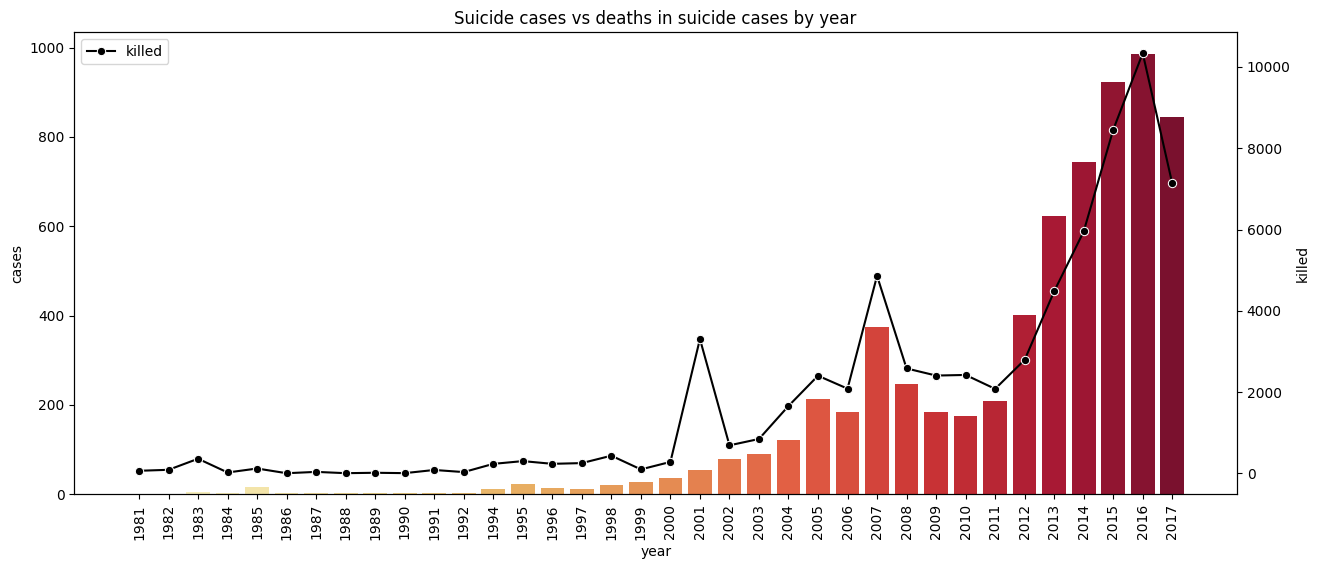

In [ ]:
import matplotlib
matplotlib.rc_file_defaults()

#creating a new dataframe to compare suicide cases and killed
new_dataset = gtd_df[['year','suicide','killed']]
new_dataset.drop(new_dataset[new_dataset['suicide'] == 0].index, inplace = True)
y = pd.DataFrame(new_dataset.groupby(['year'],as_index = True).agg({'suicide':'sum','killed':'sum'}))
y.reset_index(inplace = True)
y.rename(columns ={'suicide':'cases'},inplace = True)


#Visualising what has been the trend between the total suicide cases and the number of killed by suicided each year

cases = sns.set_style(style = None,rc = None)
fig, cases = plt.subplots(figsize=(15,6))

#creating the bar plot
cases.set_title('Suicide cases vs deaths in suicide cases by year', fontsize=12)
cases = sns.barplot( y='cases',x= 'year' ,data = y,alpha = 1,palette = 'YlOrRd')

#specifying that we want to share the same x-axis
killed = cases.twinx()

#creating the line plot 
killed = sns.lineplot(data = y['killed'],marker = 'o',color = 'black')

#showing plot
cases.set_xticklabels(cases.get_xticklabels(),rotation = 90)
plt.legend(['killed'])
plt.show()

####<i>For the year 1980 and before there has been no records for suicide killings of any kind. There has been an increase in suicide cases since 2000 and the number of killed has also seen a steep rise in comparison to cases.The 9/11 hijacking of 2001 that took place in US can be seen standalone in the plot. Most scholars argue that suicide bombers are not irrational but decide to become suicide bombers for a variety of social, organizational, economic, religious, and other reasons.But still,Suicide bombers tend to come from many different types of communities and from different situations, making individual-level generalizations difficult.</i>

###.

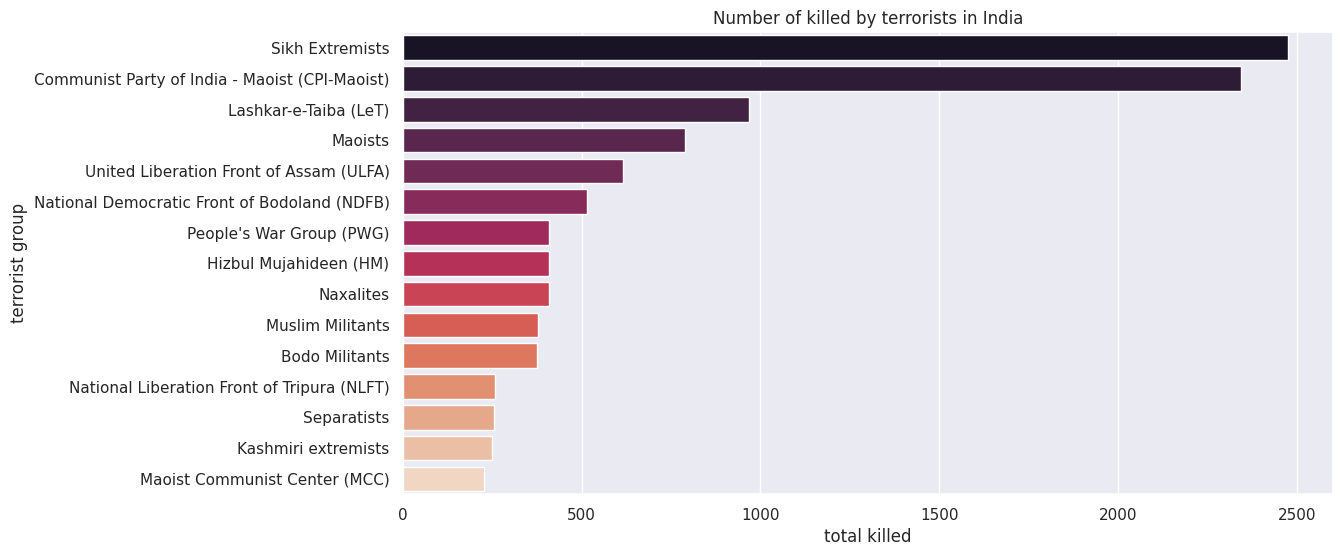

In [ ]:
#doing a groupby to find the number of killed in India by Terrorist groups
co_tg_ki = pd.DataFrame(gtd_df.groupby(['country','terror_group'],as_index=False).killed.sum().sort_values('killed',ascending = False))

#renaming the columns for the temporary df created
co_tg_ki.rename(columns = {0:'country',1:'terror_group',3:'killed'},inplace = True)

#Filtering the country column searches only for India
in_tg_ki = co_tg_ki.loc[(co_tg_ki['country'] == 'India') & (co_tg_ki['terror_group'] != 'Unknown')][:15]

in_tg_ki

#Plotting the above table
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.barplot(y = in_tg_ki['terror_group'],x = in_tg_ki['killed'],palette = 'rocket').set(title = 'Number of killed by terrorists in India',xlabel = 'total killed',ylabel = 'terrorist group')
plt.xticks(rotation = 0)
plt.show()

####<i>In the specific case of India the top terorrist groups have been the Sikh Extremists then the CPI-Maoist and then others as stated.One thing to notice in this grpah is that most of the terrorist groups in this list comprises of Seperatists and Extremisits.</i>

###.

In [ ]:
#groupby casualties and kills specific to terrorist groups, regions and countries
gtd_y = pd.DataFrame(gtd_df.groupby(['terror_group','country','region']).casualties.agg(['count','sum']).sort_values('sum',ascending = False))
gtd_y.reset_index(inplace = True)
gtd_y.rename(columns = {'region':'country_in_region','count':'total_cases','sum':'total_casualities'},inplace = True)

#excluding the unknown terrorist groups
z_1 = gtd_y.loc[gtd_y['terror_group'] != 'Unknown'][:10]
z_1

,terror_group,country,country_in_region,total_cases,total_casualities
1,Taliban,Afghanistan,South Asia,7423,57140.0
2,Islamic State of Iraq and the Levant (ISIL),Iraq,Middle East & North Africa,4797,54755.0
4,Boko Haram,Nigeria,Sub-Saharan Africa,2087,24588.0
5,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,South Asia,1596,21919.0
7,Al-Qaida,United States,North America,4,19494.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,South Asia,1335,15532.0
10,Shining Path (SL),Peru,South America,4541,14625.0
11,Al-Qaida in Iraq,Iraq,Middle East & North Africa,632,14348.0
12,Al-Shabaab,Somalia,Sub-Saharan Africa,2867,14201.0
13,Farabundo Marti National Liberation Front (FMLN),El Salvador,Central America & Caribbean,3330,12068.0


####<i>Most of the terroist groups operating in particular regions for territorial or political gains and moreover in particlar countries. One of the reasons why we can see that most of the terrorist groups have caused very heavy casualties in particular countries because those are their targets for whatever the reasons they think fits their agenda.Like Taliban is very aggressive in Afghanistan, ISIL is very active in Iraq, Boko Haram in Nigeria and so on.</i>

###.

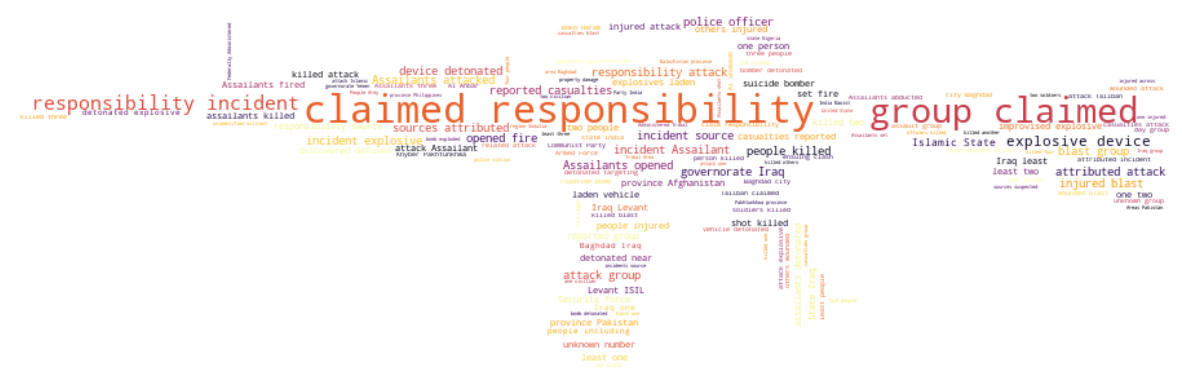

In [ ]:
#locating all the summary values without Unknown as a value
x = gtd_df.loc[gtd_df['summary'] != 'unknown']

#removing the unwanted text from the string of all summary rows
x['summary'] = x['summary'].str[10:]

#text of all words in column summary
summary_text = " ".join(review for review in x.summary.astype(str))

#getting rid of stopwords with stopwords list
summary_stopwords = set(STOPWORDS)


# bringing the mask for wordcloud image - converting jpg image to a numpy array
gun_mask = np.array(Image.open("/content/drive/MyDrive/gun.jpeg"))

#generating the wordcloud image
summary_wordcloud = WordCloud(stopwords=summary_stopwords, background_color="white",colormap = 'inferno_r',width=600, height=300, mask=gun_mask)
summary_wordcloud.generate(summary_text)

#Displaying the wordcloud image
plt.figure(figsize=[15,9])
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


###<i>Any terorist organization claiming for attacks siginifies that they are very likely to be unafraid of retaliatory strikes. Most of the organisations do this to send a message to the government or the military.</i>

In [ ]:
# #list of sources for database collection
gtd_df['dbsource'].value_counts()

START Primary Collection                    78002
PGIS                                        63740
ISVG                                        17207
CETIS                                       16163
CAIN                                         1588
UMD Schmid 2012                              1165
Hewitt Project                               1005
UMD Algeria 2010-2012                         848
UMD South Africa                              449
UMD Sri Lanka 2011                            405
UMD Miscellaneous                             259
Anti-Abortion Project 2010                    186
Eco Project 2010                              147
UMD JTMM Nepal 2012                           104
HSI                                            97
Hyland                                         71
Hijacking DB                                   54
UMD Encyclopedia of World Terrorism 2012       48
CBRN Global Chronology                         46
Armenian Website                               40


#<b>Conclusion from the visualizations</b>



In [ ]:
print(f"""The dataset here consists of record from the year {gtd_df.year.min()} to {gtd_df.year.max()},taking into account the cases from {gtd_df.country.nunique()} countries from {gtd_df.region.nunique()} regions. Approximately {gtd_df.index.nunique()} terrorist \nattacks which caused about {int(gtd_df.casualties.sum())} casualties, comprising {int(gtd_df.killed.sum())} killed and {int(gtd_df.wounded.sum())} wounded are recorded in the dataset.""")

The dataset here consists of record from the year 1970 to 2017,taking into account the cases from 205 countries from 12 regions. Approximately 181691 terrorist 
attacks which caused about 935737 casualties, comprising 411868 killed and 523869 wounded are recorded in the dataset.


In [ ]:
print('Country with the most number of terrorist attacks:',gtd_df['country'].value_counts().index[0],'.')
print('Region with the most number of terrorist attacks:',gtd_df['region'].value_counts().index[0],'.')
print('Most number of killings in a single attack are',int(gtd_df['killed'].max()),'people that took place in', gtd_df.loc[gtd_df['killed'].idxmax()].country,'.')


Country with the most number of terrorist attacks: Iraq .
Region with the most number of terrorist attacks: Middle East & North Africa .
Most number of killings in a single attack are 1570 people that took place in Iraq .


##<b>Some of the key findings pertaining to the above analysis and graphical representations are:</b>


<b><i>
###*   2014 has been the year with the most number of killings with cases close to 17000 and deaths close to 45000.

###*   There was a steep rise in the number of cases and deaths from 2011 to 2014.

###*   Most of the terrorist activites have taken place in regions with high population density like South Asia and Middle East.

###*   Middle East and South Asia has been the victim of the most number of activities both of them comprising more than 50% of the total cases by region.Casualties have also seen the same trend.

###*   Iraq, Afghanistan, Pakistan and India are the top countries with the highest number of terrorist attacks as well as casualties.

###*   Bombing/Explosion has been the most preferred attacking methods irrespective of the region. It has also seen the increase in its usage since 2001 onwards.

###*   Private citizens, Military, Police, Government and Businesses are the most suffered target types.

###*   Taliban, Islamic State of Iraq and Levant(ISIL) are the terrorist groups with the highest number of activities with Taliban being active in the Afghanistan and the ISIL in Iraq.

###*   Suicide cases have also seen an increase since 2011 and so does deaths due to suicides.Suicide alone have almost close to 6700 cases so far.
</i></b>







#<b><center>“With guns you can kill terrorists, with education you can kill terrorism.”</b>-Malala Yousafzai</center>

#<b>References</b>

*   <a href = "https://www.theguardian.com/world/2019/mar/23/the-rise-and-fall-of-the-isis-caliphate">Rise and fall of IS caliphate.</a>

*   <a href = "https://www.reuters.com/article/idINIndia-56711920110502">Major attacks by Al-Qaeda.</a>

*   <a href = "https://www.annualreviews.org/doi/10.1146/annurev-polisci-062813-051049">The rise and spread of suicide bombing.</a>
  
*   <a href = "https://www.start.umd.edu/gtd/about/">The National Consortium for the Study of Terrorism and Responses to Terrorism (START), the Global Terrorism Database.</a>

*   <a href = "https://www.cairn.info/revue-internationale-de-psychologie-sociale-2009-3-page-5.htm">From psychology of terrorists to psychology of terrorism.</a>






